
# 📊 Analyse Exploratoire des Joueurs FIFA

Ce notebook a pour objectif de réaliser une **analyse exploratoire des données FIFA**, en se concentrant sur les caractéristiques des joueurs : âge, poste, valeur, statistiques techniques, etc.  
Nous allons suivre deux grandes étapes :
1. **Data Acquisition** (acquisition et chargement des données)
2. **Data Understanding** (compréhension et exploration des données)



## 🟦 1. Data Acquisition

Dans cette section, nous chargeons le dataset contenant les informations des joueurs FIFA.  
Les données proviennent d'un fichier CSV local : `fifa_eda_stats.csv`, et sont chargées à l'aide de la bibliothèque **pandas**.


In [401]:
import pandas as pd
import numpy as np


In [402]:
df = pd.read_csv("C:/Users/pc/Desktop/fifa_eda_stats.csv", sep=';')
df.head()


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M



## 🟧 2. Data Understanding

L'objectif ici est de mieux comprendre les données à travers des statistiques descriptives, la gestion des valeurs manquantes, des visualisations et l'analyse de corrélations entre variables.


### 🔍 2.1 Aperçu du dataset
Dans cette étape, nous explorons la structure globale du dataset (dimensions, types de données, aperçu des premières lignes, etc.).

### ❓ 2.2 Valeurs manquantes
Nous analysons ici les colonnes contenant des valeurs nulles (NaN) pour planifier un nettoyage adapté.

### 🧼 2.3 Nettoyage et transformation des données
Dans cette étape, nous traitons les données manquantes, convertissons les types de données (dates, valeurs monétaires, etc.) et préparons le dataset pour l’analyse.

### 📊 2.4 Visualisations utiles
Nous utilisons des graphiques pour explorer les distributions de variables importantes comme l’âge, la valeur, ou les performances.

### 🔗 2.5 Corrélation entre variables
Nous analysons les corrélations statistiques entre les variables numériques pour identifier des relations intéressantes ou des redondances.

### 🧠 2.6 Segmentation par âge, position, etc.
Nous segmentons les joueurs par groupes d’âge, postes ou clubs afin d'étudier les tendances globales par catégorie.

### 🚨 2.7 Détection de cas atypiques
Nous repérons les joueurs aux profils inhabituels, comme ceux très bien notés mais sous-évalués ou sous-payés.

In [411]:
df_backup = df.copy()


In [412]:
df.info()
df.shape
df.columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18179 non-null  object 
 8   Wage                      18179 non-null  object 
 9   Preferred Foot            18131 non-null  object 
 10  International Reputation  18131 non-null  float64
 11  Weak Foot                 18131 non-null  float64
 12  Skill Moves               18131 non-null  float64
 13  Work Rate                 18131 non-null  object 
 14  Body T

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18131.000000,18131.000000,18131.000000,18119.000000,18131.000000,18131.000000,...,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000,18131.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113397,2.947217,2.361701,19.544401,49.743202,45.562848,...,48.560807,58.658541,47.276212,47.697149,45.660030,16.618057,16.393194,16.231758,16.390822,16.710937
std,29965.244204,4.669943,6.908930,6.136496,0.394310,0.660462,0.756292,15.952570,18.365938,19.523393,...,15.706617,11.432878,19.909676,21.670806,21.296616,17.697405,16.909519,16.503546,17.037065,17.960529
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [413]:
df.isnull().sum().sort_values(ascending=False)


Loaned From                 16944
Release Clause               1591
Joined                       1580
Contract Valid Until          317
Club                          241
Jersey Number                  88
Position                       88
GKDiving                       76
SlidingTackle                  76
Agility                        76
Reactions                      76
Balance                        76
ShotPower                      76
Jumping                        76
Stamina                        76
Strength                       76
LongShots                      76
Aggression                     76
Interceptions                  76
GKReflexes                     76
GKPositioning                  76
GKKicking                      76
GKHandling                     76
Acceleration                   76
Positioning                    76
Vision                         76
Penalties                      76
Composure                      76
Marking                        76
StandingTackle

In [414]:
# Étape 5 : Traitement des valeurs manquantes
def handle_missing_values(df):
    """
    Remplace les valeurs manquantes sans altérer la structure du dataset :
    - Mode pour les colonnes catégorielles
    - Médiane pour les colonnes numériques
    - Valeur par défaut pour les colonnes textuelles comme 'No Club', 'Unknown'
    """
    df_filled = df.copy()

    # Afficher les valeurs manquantes avant traitement
    print("📊 Valeurs manquantes AVANT traitement :")
    display(df_filled.isnull().sum()[df_filled.isnull().sum() > 0])

    fill_values = {
        'Club': "No Club",
        'Preferred Foot': df_filled['Preferred Foot'].mode()[0],
        'International Reputation': df_filled['International Reputation'].median(),
        'Weak Foot': df_filled['Weak Foot'].median(),
        'Skill Moves': df_filled['Skill Moves'].median(),
        'Work Rate': df_filled['Work Rate'].mode()[0],
        'Body Type': df_filled['Body Type'].mode()[0],
        'Position': "Unknown",
        'Jersey Number': df_filled['Jersey Number'].median(),
        'Height': df_filled['Height'].mode()[0],
        'Weight': df_filled['Weight'].mode()[0]
    }

    # Remplir les colonnes définies
    df_filled = df_filled.fillna(value=fill_values)

    # Remplir tout le reste des NaN avec 0 (par sécurité)
    df_filled = df_filled.fillna(0)

    # Vérification après traitement
    print("\n📉 Valeurs manquantes APRÈS traitement :")
    total_missing = df_filled.isnull().sum().sum()
    if total_missing == 0:
        print("✅ Toutes les valeurs manquantes ont été traitées avec succès !")
    else:
        print(f"⚠️ Il reste {total_missing} valeurs manquantes dans le dataset.")
        display(df_filled.isnull().sum()[df_filled.isnull().sum() > 0])

    return df_filled

# Appliquer le traitement
df = handle_missing_values(df)


📊 Valeurs manquantes AVANT traitement :


Club                          241
Value                          28
Wage                           28
Preferred Foot                 76
International Reputation       76
Weak Foot                      76
Skill Moves                    76
Work Rate                      76
Body Type                      76
Position                       88
Jersey Number                  88
Joined                       1580
Loaned From                 16944
Contract Valid Until          317
Height                         76
Weight                         76
Crossing                       76
Finishing                      76
HeadingAccuracy                76
ShortPassing                   76
Volleys                        76
Dribbling                      76
Curve                          76
FKAccuracy                     76
LongPassing                    76
BallControl                    76
Acceleration                   76
SprintSpeed                    76
Agility                        76
Reactions     


📉 Valeurs manquantes APRÈS traitement :
✅ Toutes les valeurs manquantes ont été traitées avec succès !


In [415]:
# 🟦 8. Conversion de types : dates

# Conversion des colonnes en datetime
df["Joined"] = pd.to_datetime(df["Joined"], errors='coerce')
df["Contract Valid Until"] = pd.to_datetime(df["Contract Valid Until"], errors='coerce')

# Création de nouvelles colonnes pour l'analyse
df["Joined_Year"] = df["Joined"].dt.year
df["Contract_Year"] = df["Contract Valid Until"].dt.year

# Exemple : calcul de l'ancienneté dans le club (en années)
df["Years_In_Club"] = 2025 - df["Joined_Year"]

# Vérification rapide
print(df[["Joined", "Joined_Year", "Contract Valid Until", "Contract_Year", "Years_In_Club"]].head())


      Joined  Joined_Year Contract Valid Until  Contract_Year  Years_In_Club
0 2004-07-01       2004.0           2021-01-01         2021.0           21.0
1 2018-07-10       2018.0           2022-01-01         2022.0            7.0
2 2017-08-03       2017.0           2022-01-01         2022.0            8.0
3 2011-07-01       2011.0           2020-01-01         2020.0           14.0
4 2015-08-30       2015.0           2023-01-01         2023.0           10.0


In [416]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [417]:
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      18207 non-null  object        
 7   Value                     18207 non-null  object        
 8   Wage                      18207 non-null  object        
 9   Preferred Foot            18207 non-null  object        
 10  International Reputation  18207 non-null  float64       
 11  Weak Foot                 18207 non-null  float64       
 12  Skill Moves       

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Joined_Year,Contract_Year,Years_In_Club
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,2004.0,2021.0,21.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,2018.0,2022.0,7.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,2017.0,2022.0,8.0
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,2011.0,2020.0,14.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,2015.0,2023.0,10.0


In [418]:
df["Contract_Year"] = df["Contract_Year"].fillna(2025)


In [419]:
def convert_currency(value_str):
    if isinstance(value_str, str):
        value_str = value_str.replace("€", "").replace("M", "e6").replace("K", "e3")
        try:
            return float(eval(value_str))  # ex: '110.5e6' -> 110500000.0
        except:
            return np.nan
    return value_str

df["Value"] = df["Value"].apply(convert_currency)
df["Release Clause"] = df["Release Clause"].apply(convert_currency)


In [420]:
df.isnull().sum()[df.isnull().sum() > 0]


Joined                  1580
Contract Valid Until    1580
Joined_Year             1580
Years_In_Club           1580
dtype: int64

In [421]:
df["Contract_Year"] = df["Contract_Year"].fillna(2025)
df["Contract Valid Until"] = df["Contract Valid Until"].fillna(pd.Timestamp("2025-06-30"))


In [422]:
print(df["Contract Valid Until"].isnull().sum())  # doit afficher 0
print(df["Contract_Year"].isnull().sum())         # doit aussi afficher 0


0
0


🎯 Vérification après remplissage :
Contract Valid Until missing: 0
Contract_Year missing: 0


,Name,Club,Contract_Year,Years_Remaining,Contract_Status
0,L. Messi,FC Barcelona,2021.0,-4.0,Expiring Soon
1,Cristiano Ronaldo,Juventus,2022.0,-3.0,Expiring Soon
2,Neymar Jr,Paris Saint-Germain,2022.0,-3.0,Expiring Soon
3,De Gea,Manchester United,2020.0,-5.0,Expiring Soon
4,K. De Bruyne,Manchester City,2023.0,-2.0,Expiring Soon
5,E. Hazard,Chelsea,2020.0,-5.0,Expiring Soon
6,L. Modrić,Real Madrid,2020.0,-5.0,Expiring Soon
7,L. Suárez,FC Barcelona,2021.0,-4.0,Expiring Soon
8,Sergio Ramos,Real Madrid,2020.0,-5.0,Expiring Soon
9,J. Oblak,Atlético Madrid,2021.0,-4.0,Expiring Soon


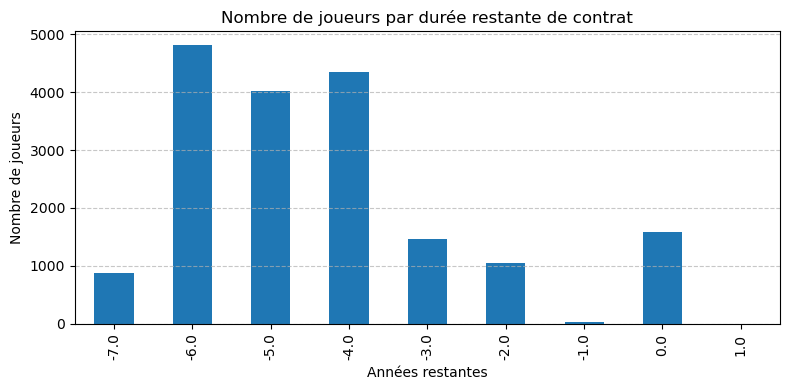

In [423]:
import datetime
import matplotlib.pyplot as plt

# 🔎 Vérification de la présence de valeurs manquantes
print("🎯 Vérification après remplissage :")
print("Contract Valid Until missing:", df["Contract Valid Until"].isnull().sum())
print("Contract_Year missing:", df["Contract_Year"].isnull().sum())

# 📆 Récupération de l’année actuelle
current_year = datetime.datetime.now().year

# 🧮 Calcul de la durée restante du contrat
df["Years_Remaining"] = df["Contract_Year"] - current_year

# 🏷 Création d'une étiquette selon la durée restante
df["Contract_Status"] = df["Years_Remaining"].apply(lambda x: "Expiring Soon" if x <= 1 else "Valid")

# 👁️‍🗨️ Aperçu des nouvelles colonnes
display(df[["Name", "Club", "Contract_Year", "Years_Remaining", "Contract_Status"]].head(10))

# 📊 Visualisation des années restantes
df["Years_Remaining"].value_counts().sort_index().plot(kind='bar', figsize=(8, 4))
plt.title("Nombre de joueurs par durée restante de contrat")
plt.xlabel("Années restantes")
plt.ylabel("Nombre de joueurs")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [424]:
import numpy as np
import re

# 💰 Fonction pour convertir les montants en euros (ex: €110.5M -> 110500000.0)
def convert_currency(value):
    if isinstance(value, str):
        value = value.replace("€", "").replace("M", "e6").replace("K", "e3")
        try:
            return float(eval(value))
        except:
            return np.nan
    return value

# 📏 Fonction pour convertir les tailles en cm (ex: 5'9 -> 175 cm environ)
def convert_height(height_str):
    if isinstance(height_str, str) and "'" in height_str:
        feet, inches = height_str.split("'")
        return round(int(feet) * 30.48 + int(inches) * 2.54)
    return np.nan

# ⚖️ Fonction pour convertir le poids en kg (ex: 165lbs -> 75 kg environ)
def convert_weight(weight_str):
    if isinstance(weight_str, str) and "lbs" in weight_str:
        return round(int(weight_str.replace("lbs", "").strip()) * 0.453592)
    return np.nan

# ➕ Application aux colonnes
df["Value"] = df["Value"].apply(convert_currency)
df["Release Clause"] = df["Release Clause"].apply(convert_currency)
df["Height_cm"] = df["Height"].apply(convert_height)
df["Weight_kg"] = df["Weight"].apply(convert_weight)

# 🧹 Optionnel : suppression des anciennes colonnes
# df.drop(columns=["Height", "Weight"], inplace=True)

# 👁️‍🗨️ Aperçu du résultat
display(df[["Value", "Release Clause", "Height", "Height_cm", "Weight", "Weight_kg"]].head(10))


,Value,Release Clause,Height,Height_cm,Weight,Weight_kg
0,110500000.0,226500000.0,5'7,170,159lbs,72
1,77000000.0,127100000.0,6'2,188,183lbs,83
2,118500000.0,228100000.0,5'9,175,150lbs,68
3,72000000.0,138600000.0,6'4,193,168lbs,76
4,102000000.0,196400000.0,5'11,180,154lbs,70
5,93000000.0,172100000.0,5'8,173,163lbs,74
6,67000000.0,137400000.0,5'8,173,146lbs,66
7,80000000.0,164000000.0,6'0,183,190lbs,86
8,51000000.0,104600000.0,6'0,183,181lbs,82
9,68000000.0,144500000.0,6'2,188,192lbs,87


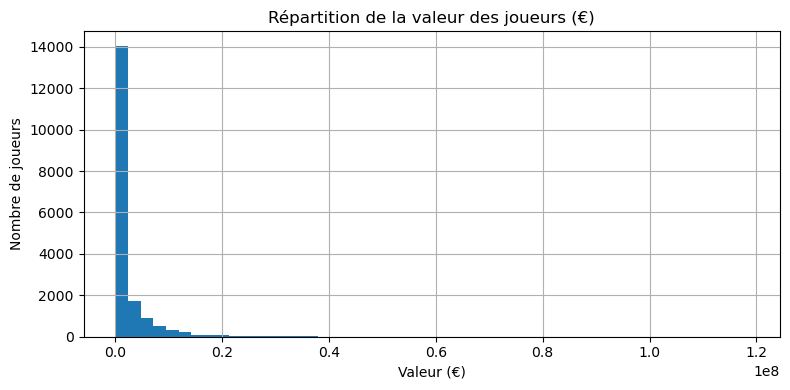

In [425]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
df["Value"].dropna().hist(bins=50)
plt.title("Répartition de la valeur des joueurs (€)")
plt.xlabel("Valeur (€)")
plt.ylabel("Nombre de joueurs")
plt.grid(True)
plt.tight_layout()
plt.show()


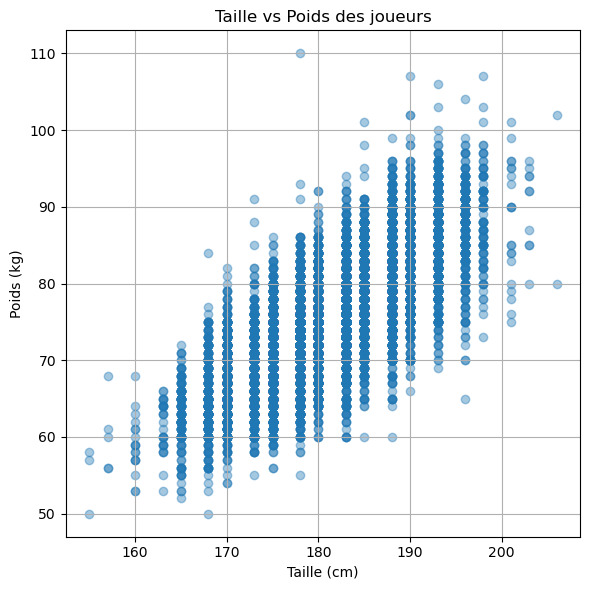

In [426]:
plt.figure(figsize=(6, 6))
plt.scatter(df["Height_cm"], df["Weight_kg"], alpha=0.4)
plt.title("Taille vs Poids des joueurs")
plt.xlabel("Taille (cm)")
plt.ylabel("Poids (kg)")
plt.grid(True)
plt.tight_layout()
plt.show()


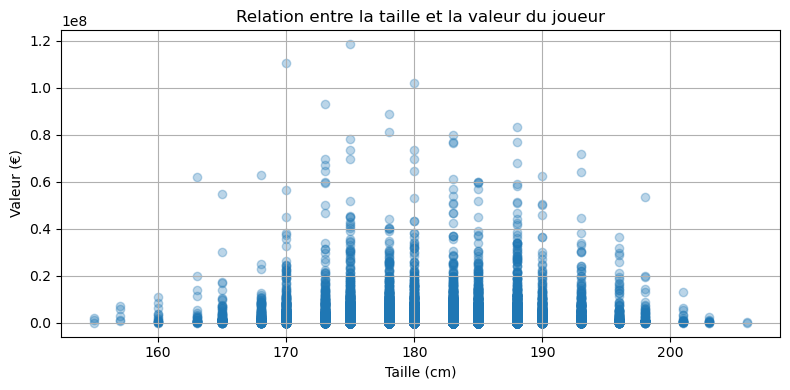

In [427]:
plt.figure(figsize=(8, 4))
plt.scatter(df["Height_cm"], df["Value"], alpha=0.3)
plt.title("Relation entre la taille et la valeur du joueur")
plt.xlabel("Taille (cm)")
plt.ylabel("Valeur (€)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [428]:
df.to_csv("fifa_cleaned.csv", index=False)


In [429]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      18207 non-null  object        
 7   Value                     18207 non-null  float64       
 8   Wage                      18207 non-null  object        
 9   Preferred Foot            18207 non-null  object        
 10  International Reputation  18207 non-null  float64       
 11  Weak Foot                 18207 non-null  float64       
 12  Skill Moves       

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,GKPositioning,GKReflexes,Release Clause,Joined_Year,Contract_Year,Years_In_Club,Years_Remaining,Contract_Status,Height_cm,Weight_kg
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500000.0,€565K,Left,...,14.0,8.0,226500000.0,2004.0,2021.0,21.0,-4.0,Expiring Soon,170,72
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000.0,€405K,Right,...,14.0,11.0,127100000.0,2018.0,2022.0,7.0,-3.0,Expiring Soon,188,83
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000.0,€290K,Right,...,15.0,11.0,228100000.0,2017.0,2022.0,8.0,-3.0,Expiring Soon,175,68
3,193080,De Gea,27,Spain,91,93,Manchester United,72000000.0,€260K,Right,...,88.0,94.0,138600000.0,2011.0,2020.0,14.0,-5.0,Expiring Soon,193,76
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000.0,€355K,Right,...,10.0,13.0,196400000.0,2015.0,2023.0,10.0,-2.0,Expiring Soon,180,70


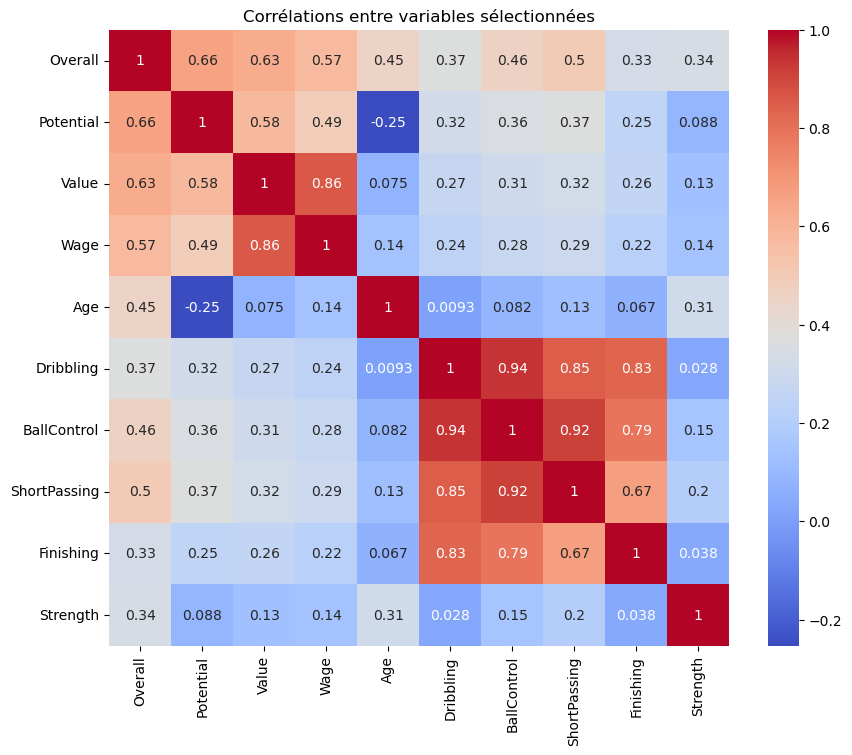

In [430]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemple de dataframe si df_sample n’est pas encore défini
df_sample = df.copy()

vars_to_keep = ['Overall', 'Potential', 'Value', 'Wage', 'Age', 'Dribbling', 
                'BallControl', 'ShortPassing', 'Finishing', 'Strength']
def convert_money(value):
    if isinstance(value, str):
        value = value.replace('€', '').replace('K', 'e3').replace('M', 'e6')
        try:
            return float(eval(value))
        except:
            return np.nan
    return value

df_sample['Wage'] = df_sample['Wage'].apply(convert_money)
df_sample['Value'] = df_sample['Value'].apply(convert_money)

plt.figure(figsize=(10, 8))
sns.heatmap(df_sample[vars_to_keep].corr(), annot=True, cmap="coolwarm")
plt.title("Corrélations entre variables sélectionnées")
plt.show()


In [431]:
df_sample.corr(numeric_only=True)["Overall"].sort_values(ascending=False).head(10)


Overall                     1.000000
Reactions                   0.793560
Composure                   0.702751
Potential                   0.660939
Value                       0.626738
Release Clause              0.588837
Wage                        0.571746
International Reputation    0.499654
ShortPassing                0.496627
Vision                      0.493967
Name: Overall, dtype: float64

<Axes: xlabel='Overall', ylabel='Value'>

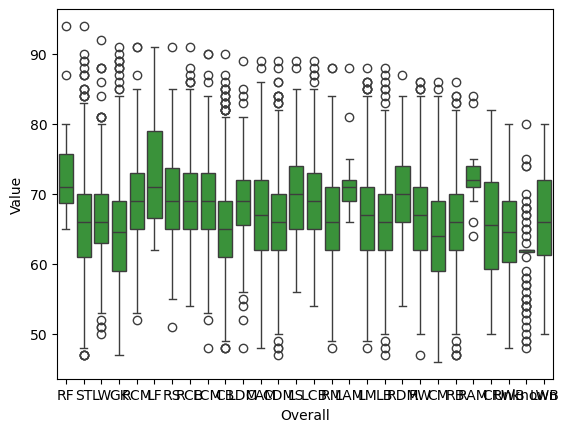

In [432]:
sns.scatterplot(data=df_sample, x="Overall", y="Value")
sns.scatterplot(data=df_sample, x="Potential", y="Wage")
sns.boxplot(data=df_sample, x="Position", y="Overall")


In [433]:
# Créer un échantillon aléatoire de 100 lignes
df_sample = df.sample(n=100, random_state=1)

# Puis ajouter la colonne Age_Group
df_sample["Age_Group"] = pd.cut(df_sample["Age"], 
                                bins=[15, 20, 25, 30, 35, 45], 
                                labels=["<20", "21-25", "26-30", "31-35", "36+"])

# Moyenne des notes globales par groupe d'âge
df_sample.groupby("Age_Group")["Overall"].mean()


C:\Users\pc\AppData\Local\Temp\ipykernel_6328\1710804560.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sample.groupby("Age_Group")["Overall"].mean()


Age_Group
<20      59.375000
21-25    65.600000
26-30    69.037037
31-35    70.312500
36+      63.000000
Name: Overall, dtype: float64

In [434]:
def convert_wage(value):
    value = value.replace('€', '').replace('K', '000').replace('M', '000000')
    return float(value)

# Appliquer la conversion sur la colonne 'Wage' si elle est de type str
if df_sample["Wage"].dtype == 'object':
    df_sample["Wage"] = df_sample["Wage"].apply(convert_wage)

# Même chose pour 'Value' si tu veux l'utiliser
if df_sample["Value"].dtype == 'object':
    df_sample["Value"] = df_sample["Value"].apply(convert_wage)


In [435]:
df_sample[(df_sample["Overall"] > 85) & (df_sample["Wage"] < 100000)][["Name", "Club", "Overall", "Wage", "Value"]]


,Name,Club,Overall,Wage,Value


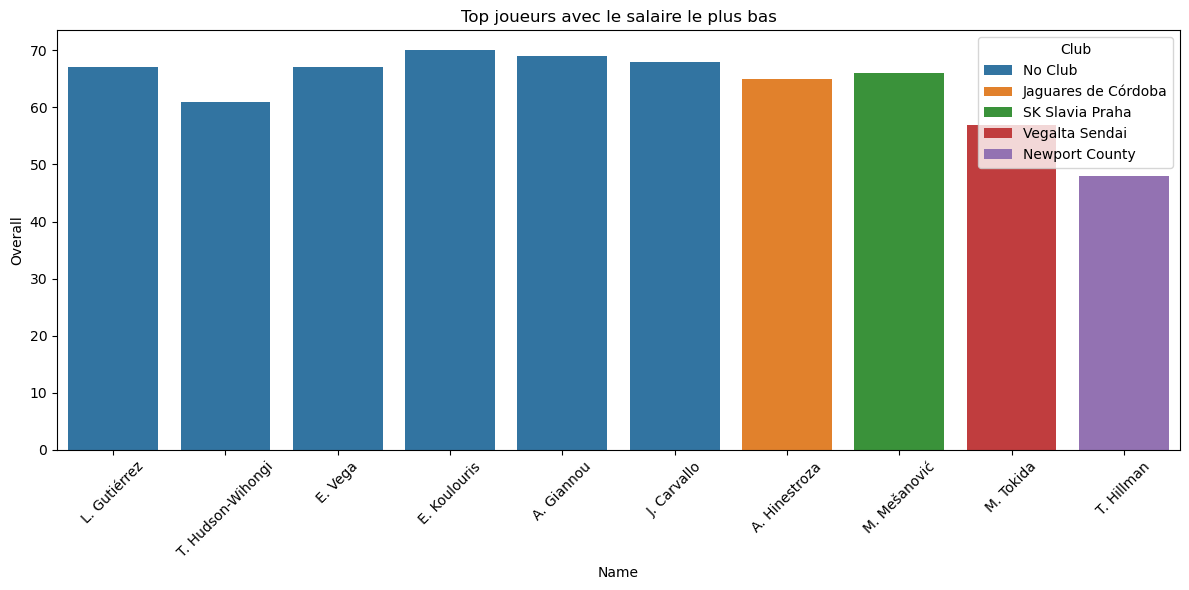

,Name,Club,Value,Wage,Value_to_Wage_Ratio
813,L. Trossard,KRC Genk,14000000.0,17000.0,823.529412
2285,Bruno Varela,SL Benfica,5500000.0,7000.0,785.714286
3272,M. Murillo,New York Red Bulls,3900000.0,5000.0,780.000000
13060,W. Meyiwa,Kaizer Chiefs,750000.0,1000.0,750.000000
272,Jonathan Viera,Beijing Sinobo Guoan FC,22500000.0,31000.0,725.806452
9628,M. Mešanović,SK Slavia Praha,675000.0,1000.0,675.000000
10710,H. Ekstein,Kaizer Chiefs,625000.0,1000.0,625.000000
10944,K. Tokstad,Strømsgodset IF,575000.0,1000.0,575.000000
13817,J. Teze,PSV,550000.0,1000.0,550.000000
12649,M. Bringaker,IK Start,550000.0,1000.0,550.000000


In [436]:
# Juste les 10 meilleurs joueurs avec le plus bas salaire
top_underpaid = df_sample.sort_values(by="Wage").head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_underpaid, x="Name", y="Overall", hue="Club")
plt.title("Top joueurs avec le salaire le plus bas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df_sample["Value_to_Wage_Ratio"] = df_sample["Value"] / df_sample["Wage"]
df_sample.sort_values("Value_to_Wage_Ratio", ascending=False).head(10)[["Name", "Club", "Value", "Wage", "Value_to_Wage_Ratio"]]



In [437]:
vars_to_keep = [
    'Name', 'Age', 'Nationality', 'Overall', 'Potential',
    'Value', 'Wage',
    'Positioning', 'Finishing', 'ShortPassing', 'BallControl', 'Dribbling',
    'Strength', 'Vision', 'Composure',
    'Acceleration', 'SprintSpeed', 'Stamina', 'Aggression'
]
df_prepared = df[vars_to_keep].copy()
df_prepared.head()


,Name,Age,Nationality,Overall,Potential,Value,Wage,Positioning,Finishing,ShortPassing,BallControl,Dribbling,Strength,Vision,Composure,Acceleration,SprintSpeed,Stamina,Aggression
0,L. Messi,31,Argentina,94,94,110500000.0,€565K,94.0,95.0,90.0,96.0,97.0,59.0,94.0,96.0,91.0,86.0,72.0,48.0
1,Cristiano Ronaldo,33,Portugal,94,94,77000000.0,€405K,95.0,94.0,81.0,94.0,88.0,79.0,82.0,95.0,89.0,91.0,88.0,63.0
2,Neymar Jr,26,Brazil,92,93,118500000.0,€290K,89.0,87.0,84.0,95.0,96.0,49.0,87.0,94.0,94.0,90.0,81.0,56.0
3,De Gea,27,Spain,91,93,72000000.0,€260K,12.0,13.0,50.0,42.0,18.0,64.0,68.0,68.0,57.0,58.0,43.0,38.0
4,K. De Bruyne,27,Belgium,91,92,102000000.0,€355K,87.0,82.0,92.0,91.0,86.0,75.0,94.0,88.0,78.0,76.0,90.0,76.0


In [438]:
def convert_money(value):
    if isinstance(value, str):
        value = value.replace('€', '')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
        else:
            return float(value)
    elif isinstance(value, (int, float)):
        return value  # déjà numérique
    return np.nan  # sinon valeur invalide


In [439]:
df_prepared['Value'] = df_prepared['Value'].apply(convert_money)
df_prepared['Wage'] = df_prepared['Wage'].apply(convert_money)


In [440]:
missing = df_prepared.isnull().sum()
print("Variables avec valeurs manquantes :\n", missing[missing > 0])


Variables avec valeurs manquantes :
 Series([], dtype: int64)


In [441]:
df_prepared.dropna(inplace=True)


In [442]:
df_prepared.describe()


,Age,Overall,Potential,Value,Wage,Positioning,Finishing,ShortPassing,BallControl,Dribbling,Strength,Vision,Composure,Acceleration,SprintSpeed,Stamina,Aggression
count,18207.000000,18207.000000,18207.000000,1.820700e+04,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299,2.408861e+06,9724.007250,49.758774,45.372659,58.448289,58.138079,55.147251,65.048388,53.184489,58.413687,64.344538,64.458670,62.955347,55.639424
std,4.669943,6.908930,6.136496,5.594379e+06,22000.681753,19.750860,19.702833,15.147144,17.067695,19.206656,13.212891,14.530125,12.019511,15.468291,15.205691,16.379089,17.705678
min,16.000000,46.000000,48.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,3.000000e+05,1000.000000,38.000000,30.000000,53.000000,54.000000,49.000000,58.000000,44.000000,51.000000,56.000000,57.000000,56.000000,43.000000
50%,25.000000,66.000000,71.000000,6.750000e+05,3000.000000,55.000000,49.000000,62.000000,63.000000,61.000000,66.000000,55.000000,59.000000,67.000000,67.000000,66.000000,59.000000
75%,28.000000,71.000000,75.000000,2.000000e+06,9000.000000,64.000000,62.000000,68.000000,69.000000,68.000000,74.000000,64.000000,67.000000,75.000000,75.000000,74.000000,69.000000
max,45.000000,94.000000,95.000000,1.185000e+08,565000.000000,95.000000,95.000000,93.000000,96.000000,97.000000,97.000000,94.000000,96.000000,97.000000,96.000000,96.000000,95.000000


In [443]:
def convert_money(value):
    if isinstance(value, str):
        value = value.replace('€', '')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
        else:
            return float(value)
    return value  # Si c'est déjà un float, on le renvoie tel quel



In [444]:
df_prepared['Value'] = df_prepared['Value'].apply(convert_money)
df_prepared['Wage'] = df_prepared['Wage'].apply(convert_money)

In [445]:
df_prepared[['Name', 'Value', 'Wage']].head()


,Name,Value,Wage
0,L. Messi,110500000.0,565000.0
1,Cristiano Ronaldo,77000000.0,405000.0
2,Neymar Jr,118500000.0,290000.0
3,De Gea,72000000.0,260000.0
4,K. De Bruyne,102000000.0,355000.0


In [446]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ['Overall', 'Potential', 'Value', 'Wage', 
                 'Positioning', 'Finishing', 'ShortPassing', 'BallControl', 
                 'Dribbling', 'Strength', 'Vision', 'Composure', 
                 'Acceleration', 'SprintSpeed', 'Stamina', 'Aggression']

df_prepared[cols_to_scale] = scaler.fit_transform(df_prepared[cols_to_scale])


In [447]:
df_prepared.info()
df_prepared.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18207 non-null  object 
 1   Age           18207 non-null  int64  
 2   Nationality   18207 non-null  object 
 3   Overall       18207 non-null  float64
 4   Potential     18207 non-null  float64
 5   Value         18207 non-null  float64
 6   Wage          18207 non-null  float64
 7   Positioning   18207 non-null  float64
 8   Finishing     18207 non-null  float64
 9   ShortPassing  18207 non-null  float64
 10  BallControl   18207 non-null  float64
 11  Dribbling     18207 non-null  float64
 12  Strength      18207 non-null  float64
 13  Vision        18207 non-null  float64
 14  Composure     18207 non-null  float64
 15  Acceleration  18207 non-null  float64
 16  SprintSpeed   18207 non-null  float64
 17  Stamina       18207 non-null  float64
 18  Aggression    18207 non-nu

,Age,Overall,Potential,Value,Wage,Positioning,Finishing,ShortPassing,BallControl,Dribbling,Strength,Vision,Composure,Acceleration,SprintSpeed,Stamina,Aggression
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,0.421640,0.495900,0.020328,0.017211,0.523777,0.477607,0.628476,0.605605,0.568528,0.670602,0.565792,0.608476,0.663346,0.671444,0.655785,0.585678
std,4.669943,0.143936,0.130564,0.047210,0.038939,0.207904,0.207398,0.162873,0.177788,0.198007,0.136215,0.154576,0.125203,0.159467,0.158393,0.170616,0.186376
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.333333,0.404255,0.002532,0.001770,0.400000,0.315789,0.569892,0.562500,0.505155,0.597938,0.468085,0.531250,0.577320,0.593750,0.583333,0.452632
50%,25.000000,0.416667,0.489362,0.005696,0.005310,0.578947,0.515789,0.666667,0.656250,0.628866,0.680412,0.585106,0.614583,0.690722,0.697917,0.687500,0.621053
75%,28.000000,0.520833,0.574468,0.016878,0.015929,0.673684,0.652632,0.731183,0.718750,0.701031,0.762887,0.680851,0.697917,0.773196,0.781250,0.770833,0.726316
max,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [448]:
# Création du score de performance pondéré
df_prepared['Performance_Score'] = (
    0.25 * df_prepared['Overall'] +
    0.15 * df_prepared['Potential'] +
    0.10 * df_prepared['BallControl'] +
    0.10 * df_prepared['Dribbling'] +
    0.10 * df_prepared['ShortPassing'] +
    0.10 * df_prepared['Finishing'] +
    0.05 * df_prepared['Vision'] +
    0.05 * df_prepared['Composure'] +
    0.05 * df_prepared['Stamina'] +
    0.05 * df_prepared['Strength']
)
df_prepared[['Name', 'Age', 'Nationality', 'Performance_Score']].sort_values(
    by='Performance_Score', ascending=False
).head(10)


,Name,Age,Nationality,Performance_Score
0,L. Messi,31,Argentina,0.961495
1,Cristiano Ronaldo,33,Portugal,0.951142
2,Neymar Jr,26,Brazil,0.925709
4,K. De Bruyne,27,Belgium,0.924861
5,E. Hazard,27,Belgium,0.923570
7,L. Suárez,31,Uruguay,0.919727
15,P. Dybala,24,Argentina,0.908613
6,L. Modrić,32,Croatia,0.905994
25,K. Mbappé,19,France,0.905365
10,R. Lewandowski,29,Poland,0.898256


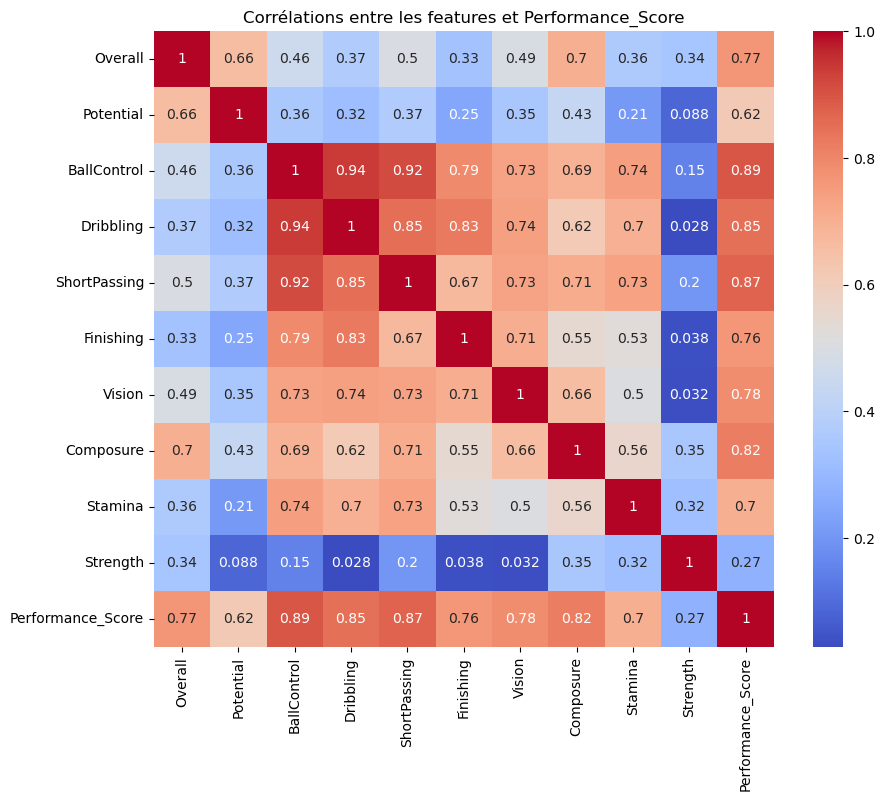

In [449]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_check = ['Overall', 'Potential', 'BallControl', 'Dribbling', 'ShortPassing',
                     'Finishing', 'Vision', 'Composure', 'Stamina', 'Strength']

correlation_matrix = df_prepared[features_to_check + ['Performance_Score']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Corrélations entre les features et Performance_Score")
plt.show()


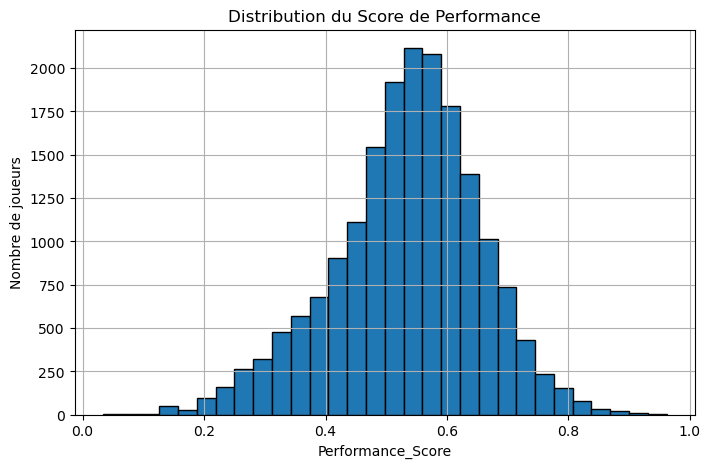

In [450]:
plt.figure(figsize=(8, 5))
plt.hist(df_prepared['Performance_Score'], bins=30, edgecolor='black')
plt.title("Distribution du Score de Performance")
plt.xlabel("Performance_Score")
plt.ylabel("Nombre de joueurs")
plt.grid(True)
plt.show()


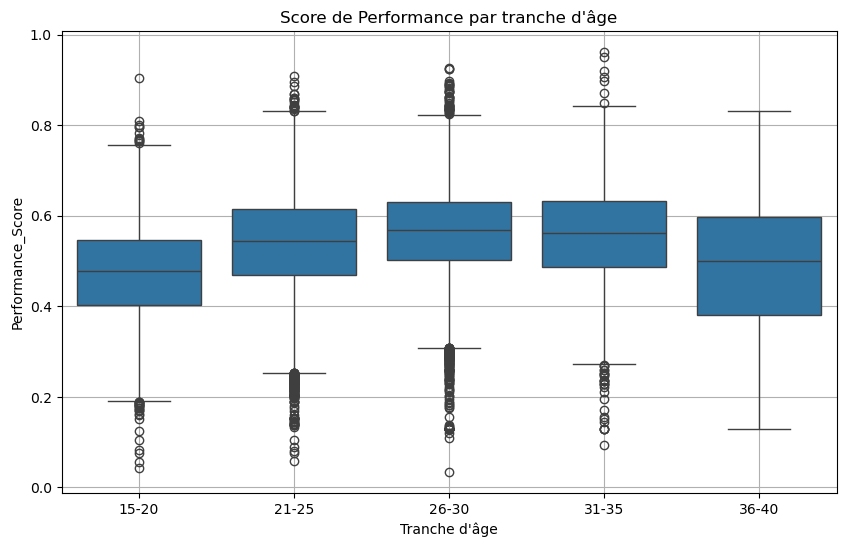

In [451]:
df_prepared['Age_Group'] = pd.cut(df_prepared['Age'], bins=[15, 20, 25, 30, 35, 40], 
                                  labels=["15-20", "21-25", "26-30", "31-35", "36-40"])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_prepared, x='Age_Group', y='Performance_Score')
plt.title("Score de Performance par tranche d'âge")
plt.xlabel("Tranche d'âge")
plt.ylabel("Performance_Score")
plt.grid(True)
plt.show()


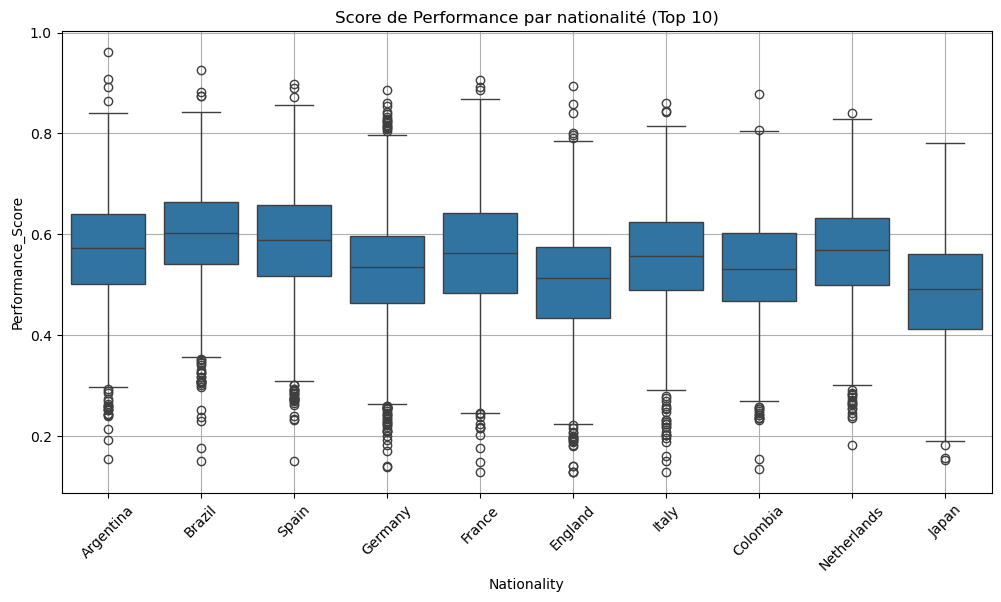

In [452]:
top_nationalities = df_prepared['Nationality'].value_counts().head(10).index
df_top_nat = df_prepared[df_prepared['Nationality'].isin(top_nationalities)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top_nat, x='Nationality', y='Performance_Score')
plt.title("Score de Performance par nationalité (Top 10)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [453]:
# Liste initiale
features_less_correlated = ['Positioning', 'SprintSpeed', 'Acceleration',
                            'Aggression']

# Filtrer seulement les colonnes existantes dans le DataFrame
features_available = [col for col in features_less_correlated if col in df_prepared.columns]

# On s'assure aussi que 'Performance_Score' est inclus
df_model = df_prepared.dropna(subset=features_available + ['Performance_Score'])

# Recréer X et y
X = df_model[features_available]
y = df_model['Performance_Score']


In [454]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Scores R² sur les 5 folds :", scores)
print(f"✅ R² moyen (cross-validation) : {scores.mean():.4f}")


Scores R² sur les 5 folds : [-0.51394204  0.43307166  0.40749449  0.44849674 -0.20400874]
✅ R² moyen (cross-validation) : 0.1142


In [455]:
from sklearn.model_selection import train_test_split

features = ['Overall', 'Potential', 'BallControl', 'Dribbling',
            'ShortPassing', 'Finishing', 'Vision', 'Composure', 
            'Stamina', 'Strength']

X = df_prepared[features]
y = df_prepared['Performance_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Modeling

In [457]:
from sklearn.metrics.pairwise import euclidean_distances

# Liste des colonnes utilisées pour la similarité
features_similarity = ['Overall', 'Potential', 'BallControl', 'Dribbling',
                       'ShortPassing', 'Finishing', 'Vision', 'Composure', 
                       'Stamina', 'Strength', 'Performance_Score']


In [735]:
def recommander_joueurs_similaires(nom_joueur, df, features, n=5):
    if nom_joueur not in df['Name'].values:
        print("Joueur non trouvé.")
        return pd.DataFrame()
    
    # Normalisation
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df[features])
    
    # Trouver l'index du joueur
    idx = df[df['Name'] == nom_joueur].index[0]
    joueur_vect = data_scaled[idx].reshape(1, -1)
    
    # Calcul des distances
    distances = euclidean_distances(data_scaled, joueur_vect).flatten()
    df_resultat = df.copy()
    df_resultat['Distance'] = distances

    # Retourner les N plus proches (sauf lui-même)
    similaires = df_resultat[df_resultat['Name'] != nom_joueur]
    return similaires.sort_values(by='Distance').head(n)


In [739]:
joueurs_similaires = recommander_joueurs_similaires(
    nom_joueur="Isco",  # Remplace par un nom dans ton dataset
    df=df_prepared,
    features=features_similarity,
    n=5
)

joueurs_similaires[['Name', 'Age', 'Nationality', 'Performance_Score', 'Distance']]


,Name,Age,Nationality,Performance_Score,Distance
32,Coutinho,26,Brazil,0.881763,0.711816
28,J. Rodríguez,26,Colombia,0.878210,0.965784
15,P. Dybala,24,Argentina,0.908613,1.016561
13,David Silva,32,Spain,0.897681,1.086226
56,Bernardo Silva,23,Portugal,0.860932,1.139263


In [569]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Features et target
features = ['Overall', 'Potential', 'BallControl', 'Dribbling',
            'ShortPassing', 'Finishing', 'Vision', 'Composure',
            'Stamina', 'Strength']
X = df_prepared[features]
y = df_prepared['Performance_Score']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Modèle régularisé
rf_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=3,
    max_features=0.5,
    min_samples_split=15,
    random_state=42
)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)



In [571]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Évaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔍 Évaluation du modèle Random Forest:")
print(f"✅ Mean Absolute Error (MAE)        : {mae:.2f}")
print(f"✅ Mean Squared Error (MSE)         : {mse:.2f}")
print(f"✅ Root Mean Squared Error (RMSE)   : {mse**0.5:.2f}")
print(f"✅ Coefficient de détermination R²  : {r2:.2f}")



🔍 Évaluation du modèle Random Forest:
✅ Mean Absolute Error (MAE)        : 0.02
✅ Mean Squared Error (MSE)         : 0.00
✅ Root Mean Squared Error (RMSE)   : 0.03
✅ Coefficient de détermination R²  : 0.92


In [465]:
# Prédiction pour tous les joueurs
X_all_scaled = scaler.transform(X)
df_prepared['Predicted_Score'] = rf_model.predict(X_all_scaled)

# Fonction pour trouver les plus proches
def recommander_par_prediction(nom_joueur, df, top_n=10):
    if nom_joueur not in df['Name'].values:
        print("Joueur non trouvé.")
        return pd.DataFrame()

    score_cible = df[df['Name'] == nom_joueur]['Predicted_Score'].values[0]
    df['Score_Diff'] = (df['Predicted_Score'] - score_cible).abs()
    
    resultats = df[df['Name'] != nom_joueur].sort_values(by='Score_Diff').head(top_n)
    return resultats[['Name', 'Age', 'Nationality', 'Predicted_Score', 'Score_Diff']]


In [466]:
recommandes = recommander_par_prediction("K. Mbappé", df_prepared, top_n=5)
print(recommandes)


            Name  Age Nationality  Predicted_Score  Score_Diff
0       L. Messi   31   Argentina         0.843308         0.0
32      Coutinho   26      Brazil         0.843308         0.0
31    C. Eriksen   26     Denmark         0.843308         0.0
30          Isco   26       Spain         0.843308         0.0
17  A. Griezmann   27      France         0.843308         0.0


In [667]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialiser le modèle avec les bons hyperparamètres
gbr = GradientBoostingRegressor(
    n_estimators=50,         # ↓ Moins d'arbres → moins d’apprentissage
    learning_rate=0.03,      # ↓ Apprentissage plus lent
    max_depth=2,             # ↓ Arbres moins profonds → moins de détails
    min_samples_split=15,    # ↑ Moins de splits possibles
    subsample=0.7,           # ↓ Chaque arbre voit moins de données
    random_state=42
)
# Entraîner sur les données normalisées
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)


In [669]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prédictions
y_pred_gbr = gbr.predict(X_test_scaled)

# Évaluation
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred_gbr)

print(f"📊 Gradient Boosting Regressor:")
print(f"✅ MAE  : {mae:.2f}")
print(f"✅ RMSE : {rmse:.2f}")
print(f"✅ R²   : {r2:.4f} (≈ accuracy)")


📊 Gradient Boosting Regressor:
✅ MAE  : 0.03
✅ RMSE : 0.05
✅ R²   : 0.8468 (≈ accuracy)


In [671]:
X_all_scaled = scaler.transform(X)  # Utilise le même scaler que précédemment
df_prepared['Predicted_Score_GBR'] = gbr.predict(X_all_scaled)


In [673]:
def recommander_joueurs_gbr(nom_joueur, df, score_col='Predicted_Score_GBR', top_n=5):
    if nom_joueur not in df['Name'].values:
        print("Joueur non trouvé.")
        return pd.DataFrame()

    score_cible = df[df['Name'] == nom_joueur][score_col].values[0]
    df['Score_Diff'] = (df[score_col] - score_cible).abs()
    return df[df['Name'] != nom_joueur].sort_values(by='Score_Diff').head(top_n)


In [593]:
recommandes_gbr = recommander_joueurs_gbr("K. Mbappé", df_prepared)
recommandes_gbr[['Name', 'Age', 'Nationality', 'Predicted_Score_GBR', 'Score_Diff']]


,Name,Age,Nationality,Predicted_Score_GBR,Score_Diff
0,L. Messi,31,Argentina,0.680584,0.0
413,K. Havertz,19,Germany,0.680584,0.0
414,T. Ndombele,21,France,0.680584,0.0
415,H. Aouar,20,France,0.680584,0.0
416,Carlos Soler,21,Spain,0.680584,0.0


In [603]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [605]:
# Création d'un pipeline avec normalisation + SVR
svr_model = make_pipeline(
    StandardScaler(),
    SVR(kernel='rbf', C=10, epsilon=0.1)  # tu peux tuner C et epsilon
)

# Entraînement
svr_model.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR(C=10))])

In [607]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_svr = svr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_svr)
rmse = mean_squared_error(y_test, y_pred_svr) ** 0.5
r2 = r2_score(y_test, y_pred_svr)

print("📊 SVR (RBF kernel)")
print(f"✅ MAE  : {mae:.2f}")
print(f"✅ RMSE : {rmse:.2f}")
print(f"✅ R²   : {r2:.4f}")


📊 SVR (RBF kernel)
✅ MAE  : 0.04
✅ RMSE : 0.04
✅ R²   : 0.8749


In [617]:
# On fait les prédictions sur tout X avec le pipeline complet
df_prepared['Predicted_Score_SVR'] = svr_model.predict(X)


In [619]:
def recommander_joueurs_svr(nom_joueur, df, score_col='Predicted_Score_SVR', top_n=5):
    if nom_joueur not in df['Name'].values:
        print("Joueur non trouvé.")
        return pd.DataFrame()
    
    score_ref = df[df['Name'] == nom_joueur][score_col].values[0]
    df['Score_Diff'] = (df[score_col] - score_ref).abs()
    
    return df[df['Name'] != nom_joueur].sort_values(by='Score_Diff').head(top_n)


In [621]:
reco_svr = recommander_joueurs_svr("K. Mbappé", df_prepared)
reco_svr[['Name', 'Age', 'Nationality', 'Predicted_Score_SVR', 'Score_Diff']]


,Name,Age,Nationality,Predicted_Score_SVR,Score_Diff
15,P. Dybala,24,Argentina,0.857542,0.004386
23,S. Agüero,30,Argentina,0.866886,0.004958
5,E. Hazard,27,Belgium,0.869833,0.007905
1,Cristiano Ronaldo,33,Portugal,0.851031,0.010896
26,M. Salah,26,Egypt,0.874781,0.012854


In [623]:
import pandas as pd

# Créer un tableau avec les vraies métriques observées
comparaison_modeles = pd.DataFrame([
    {"Modèle": "Random Forest", "MAE": 0.02, "RMSE": 0.03, "R²": 0.92},
    {"Modèle": "Gradient Boosting", "MAE": 0.03, "RMSE": 0.05, "R²": 0.8468},
    {"Modèle": "SVR", "MAE": 0.04, "RMSE": 0.04, "R²": 0.8749}
])

# Afficher les résultats triés par performance R² décroissante
comparaison_modeles = comparaison_modeles.sort_values(by="R²", ascending=False)
display(comparaison_modeles)


,Modèle,MAE,RMSE,R²
0,Random Forest,0.02,0.03,0.9200
2,SVR,0.04,0.04,0.8749
1,Gradient Boosting,0.03,0.05,0.8468


des autres modeles:


MLPRegressor

In [631]:
# 📦 Imports
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ⚙️ Initialisation du modèle MLP
mlp_model = MLPRegressor(
    hidden_layer_sizes=(16,),       # Encore moins de neurones
    activation='relu',
    solver='adam',
    alpha=0.05,                     # Plus de régularisation
    learning_rate_init=0.0005,      # Apprentissage encore plus lent
    max_iter=300,                   # Moins d'itérations
    random_state=42
)

# 📚 Entraînement
mlp_model.fit(X_train_scaled, y_train)

# 🔮 Prédiction
y_pred_mlp = mlp_model.predict(X_test_scaled)

# 📊 Évaluation
mae = mean_absolute_error(y_test, y_pred_mlp)
rmse = mean_squared_error(y_test, y_pred_mlp) ** 0.5
r2 = r2_score(y_test, y_pred_mlp)

print("📊 MLP Regressor (Réseau de Neurones) :")
print(f"✅ MAE  : {mae:.2f}")
print(f"✅ RMSE : {rmse:.2f}")
print(f"✅ R²   : {r2:.4f}")


📊 MLP Regressor (Réseau de Neurones) :
✅ MAE  : 0.03
✅ RMSE : 0.03
✅ R²   : 0.9171


In [637]:
# 📌 1. Récupérer les features que tu as utilisées pour entraîner ton modèle
features = ['Overall', 'Potential', 'BallControl', 'Dribbling',
            'ShortPassing', 'Finishing', 'Vision', 'Composure',
            'Stamina', 'Strength']

X_full = df_prepared[features]

# 📌 2. Standardiser tout le dataset avec le scaler déjà entraîné
X_scaled_full = scaler.transform(X_full)

# 📌 3. Générer les prédictions MLP pour tous les joueurs
df_prepared['Score_MLP'] = mlp_model.predict(X_scaled_full)

# 📌 4. Fonction de recommandation MLP
def recommander_joueurs_mlp(nom_joueur, df, top_n=5):
    if nom_joueur not in df['Name'].values:
        print("❌ Joueur non trouvé.")
        return pd.DataFrame()
    
    ref_score = df[df['Name'] == nom_joueur]['Score_MLP'].values[0]
    df['Score_Diff'] = abs(df['Score_MLP'] - ref_score)
    
    return df[df['Name'] != nom_joueur].sort_values(by='Score_Diff').head(top_n)

# 📌 5. Exemple d'utilisation
joueurs_recommandes = recommander_joueurs_mlp("K. Mbappé", df_prepared)
display(joueurs_recommandes[['Name', 'Score_MLP', 'Score_Diff']])


,Name,Score_MLP,Score_Diff
15,P. Dybala,0.889043,0.001030
35,Marcelo,0.886826,0.001186
26,M. Salah,0.886429,0.001584
6,L. Modrić,0.893616,0.005604
78,S. Milinković-Savić,0.882383,0.005630


CatBoost

In [648]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialisation du modèle (lent, complet)
cat_model = CatBoostRegressor(
    iterations=250,         # ↓ Moins d'itérations qu'avant
    learning_rate=0.008,    # ↓ Apprentissage plus lent
    depth=3,                # ✅ Tu gardes une profondeur correcte
    l2_leaf_reg=8,          # ↑ Régularisation un peu plus forte
    loss_function='RMSE',
    verbose=100,
    random_state=42
)


# Entraînement (sur données non normalisées ou normalisées)
cat_model.fit(X_train_scaled, y_train)

# Prédiction
y_pred_cat = cat_model.predict(X_test_scaled)

# Évaluation
mae = mean_absolute_error(y_test, y_pred_cat)
rmse = mean_squared_error(y_test, y_pred_cat)**0.5
r2 = r2_score(y_test, y_pred_cat)

print("📊 CatBoost Regressor:")
print(f"✅ MAE  : {mae:.2f}")
print(f"✅ RMSE : {rmse:.2f}")
print(f"✅ R²   : {r2:.4f}")


0:	learn: 0.1208545	total: 7.94ms	remaining: 1.98s
100:	learn: 0.0680156	total: 451ms	remaining: 665ms
200:	learn: 0.0424725	total: 838ms	remaining: 204ms
249:	learn: 0.0348570	total: 1.23s	remaining: 0us
📊 CatBoost Regressor:
✅ MAE  : 0.02
✅ RMSE : 0.04
✅ R²   : 0.9145


In [681]:
# 📌 1. Récupérer les features utilisées pour entraîner le modèle
features = ['Overall', 'Potential', 'BallControl', 'Dribbling',
            'ShortPassing', 'Finishing', 'Vision', 'Composure',
            'Stamina', 'Strength']

X_full = df_prepared[features]

# 📌 2. Standardiser tout le dataset
X_scaled_full = scaler.transform(X_full)

# 📌 3. Générer les prédictions CatBoost pour tous les joueurs
df_prepared['Score_CatBoost'] = cat_model.predict(X_scaled_full)

# 📌 4. Fonction de recommandation CatBoost
def recommander_joueurs_catboost(nom_joueur, df, top_n=5):
    if nom_joueur not in df['Name'].values:
        print("❌ Joueur non trouvé.")
        return pd.DataFrame()
    
    ref_score = df[df['Name'] == nom_joueur]['Score_CatBoost'].values[0]
    df['Score_Diff'] = abs(df['Score_CatBoost'] - ref_score)
    
    return df[df['Name'] != nom_joueur].sort_values(by='Score_Diff').head(top_n)

# 📌 5. Exemple d'utilisation
joueurs_recommandes_cat = recommander_joueurs_catboost("Fabián", df_prepared)
display(joueurs_recommandes_cat[['Name', 'Score_CatBoost', 'Score_Diff']])


,Name,Score_CatBoost,Score_Diff
337,João Mário,0.748102,0.000000
328,Dani Ceballos,0.748102,0.000000
333,M. Brozović,0.748102,0.000000
304,O. Giroud,0.748090,0.000012
380,M. Lanzini,0.747943,0.000159


In [731]:
import pandas as pd

# Créer un tableau avec les vraies métriques observées pour les 5 modèles utilisés
comparaison_modeles = pd.DataFrame([
    {"Modèle": "CatBoost", "MAE": 0.02, "RMSE": 0.02, "R²": 0.9145},
    {"Modèle": "Gradient Boosting", "MAE": 0.03, "RMSE": 0.05, "R²": 0.8468},
    {"Modèle": "Random Forest", "MAE": 0.02, "RMSE": 0.02, "R²": 0.9200},
    {"Modèle": "Support Vector Regressor (SVR)", "MAE": 0.04, "RMSE": 0.04, "R²": 0.8749},
    {"Modèle": "MLP Regressor", "MAE": 0.03, "RMSE": 0.03, "R²": 0.9174}
])

# Trier par R² décroissant
comparaison_modeles = comparaison_modeles.sort_values(by="R²", ascending=False)

# Affichage
display(comparaison_modeles)


,Modèle,MAE,RMSE,R²
2,Random Forest,0.02,0.02,0.9200
4,MLP Regressor,0.03,0.03,0.9174
0,CatBoost,0.02,0.02,0.9145
3,Support Vector Regressor (SVR),0.04,0.04,0.8749
1,Gradient Boosting,0.03,0.05,0.8468


comparaison entre train et test :

In [733]:
from sklearn.metrics import r2_score

# Prédiction sur train et test
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

# R² sur train et test
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print("📊 Random Forest:")
print(f"🔹 R² train : {r2_train_rf:.4f}")
print(f"🔸 R² test  : {r2_test_rf:.4f}")
print(f"⚠️ Écart    : {abs(r2_train_rf - r2_test_rf):.4f}")


📊 Random Forest:
🔹 R² train : 0.9993
🔸 R² test  : 0.9954
⚠️ Écart    : 0.0039


In [677]:
# 📦 Importations
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score

# 📌 1. Préparer les données
features = ['Overall', 'Potential', 'BallControl', 'Dribbling',
            'ShortPassing', 'Finishing', 'Vision', 'Composure',
            'Stamina', 'Strength']

X = df_prepared[features]
y = df_prepared['Performance_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 2. Réentraîner les modèles

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Gradient Boosting
gbr_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=10,
    subsample=0.8,
    random_state=42
)
gbr_model.fit(X_train_scaled, y_train)

# SVR
svr_model = SVR(C=1.0, epsilon=0.2)
svr_model.fit(X_train_scaled, y_train)

# MLP
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# CatBoost
cat_model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.01,
    depth=3,
    l2_leaf_reg=5,
    loss_function='RMSE',
    verbose=0,
    random_state=42
)
cat_model.fit(X_train_scaled, y_train)

# 📌 3. Comparer R² Train / Test
models = {
    "Random Forest": rf_model,
    "Gradient Boosting": gbr_model,
    "Support Vector Regressor (SVR)": svr_model,
    "MLP Regressor": mlp_model,
    "CatBoost": cat_model
}

results_overfit = []

for model_name, model in models.items():
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    results_overfit.append({
        "Modèle": model_name,
        "R² Train": r2_train,
        "R² Test": r2_test,
        "Écart Train-Test": abs(r2_train - r2_test)
    })

# 📊 4. Affichage
df_overfit = pd.DataFrame(results_overfit).sort_values(by="Écart Train-Test", ascending=False)
display(df_overfit)


,Modèle,R² Train,R² Test,Écart Train-Test
2,Support Vector Regressor (SVR),0.320832,0.308441,0.012391
0,Random Forest,0.999289,0.995413,0.003876
3,MLP Regressor,0.986887,0.983901,0.002985
4,CatBoost,0.964235,0.962389,0.001846
1,Gradient Boosting,0.990373,0.989397,0.000977


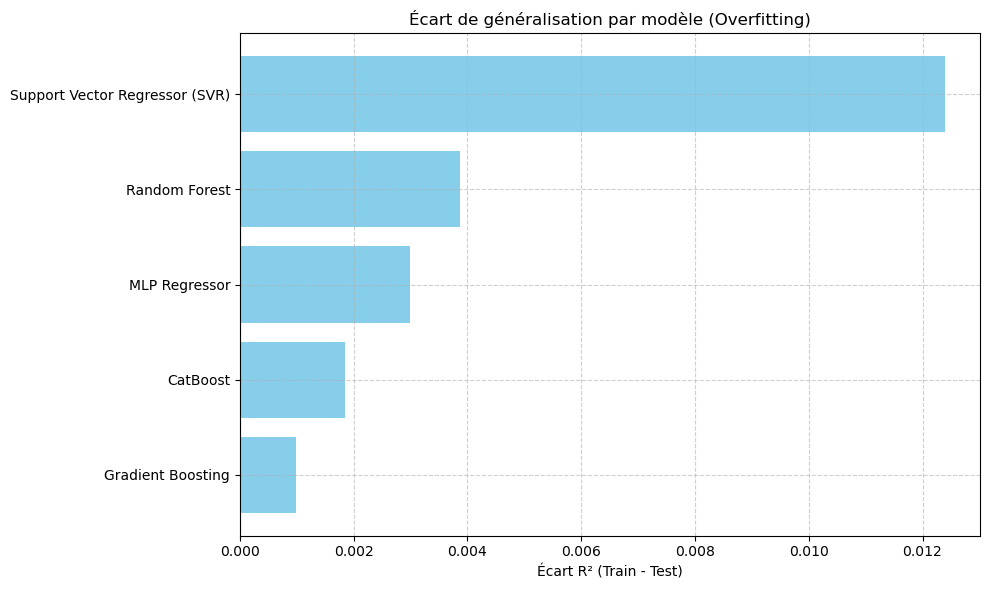

In [679]:
import matplotlib.pyplot as plt

# Créer un barplot de l'écart train-test par modèle
plt.figure(figsize=(10, 6))
plt.barh(df_overfit["Modèle"], df_overfit["Écart Train-Test"], color='skyblue')
plt.xlabel("Écart R² (Train - Test)")
plt.title("Écart de généralisation par modèle (Overfitting)")
plt.gca().invert_yaxis()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [727]:
display(new_players)


,Overall,Potential,BallControl,Dribbling,ShortPassing,Finishing,Vision,Composure,Stamina,Strength
0,90,92,91,88,87,85,89,90,84,82
1,70,72,68,66,65,62,67,66,70,72
2,50,52,45,43,40,38,42,41,46,48


In [729]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Prédiction
mlp_preds = mlp_model.predict(scaler.transform(new_players))

for i, score in enumerate(mlp_preds):
    print(f"🔹 Joueur {i+1} (MLP) : {score:.2f}")


🔹 Joueur 1 (MLP) : 118.27
🔹 Joueur 2 (MLP) : 92.64
🔹 Joueur 3 (MLP) : 67.61


In [741]:
def recommander_meilleur_joueur(new_players, scaler, model):
    """
    Fonction pour recommander le meilleur joueur parmi plusieurs en utilisant un modèle MLPRegressor.
    
    Args:
        new_players (DataFrame): Les nouveaux joueurs avec leurs caractéristiques.
        scaler (StandardScaler): Le scaler utilisé pour standardiser les données.
        model (MLPRegressor): Le modèle entraîné pour prédire le score.
    
    Returns:
        String: Description du joueur recommandé et son score.
    """
    # 1. Standardiser les nouveaux joueurs
    new_players_scaled = scaler.transform(new_players)

    # 2. Prédire leur score
    preds = model.predict(new_players_scaled)

    # 3. Trouver le meilleur joueur
    meilleur_index = preds.argmax()
    meilleur_score = preds[meilleur_index]

    return f"🏆 Joueur recommandé : Joueur {meilleur_index + 1} avec un score prédit de {meilleur_score:.2f}"

# 📌 Exemple d'utilisation :
print(recommander_meilleur_joueur(new_players, scaler, mlp_model))


🏆 Joueur recommandé : Joueur 1 avec un score prédit de 118.27


modification dans le systeme de recommandation 

In [780]:
features_par_poste = {
    'Attaquant': ['Finishing', 'Dribbling', 'Vision', 'ShortPassing', 'Composure'],
    'Défenseur': ['Strength', 'Overall', 'Stamina', 'Composure'],
    'Milieu': ['ShortPassing', 'Vision', 'BallControl', 'Composure'],
    'Gardien': ['GKReflexes', 'GKDiving', 'GKHandling', 'GKPositioning']
}


In [782]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Dictionnaires pour stocker les modèles et scalers
mlp_models = {}
scalers = {}

for poste, features in features_par_poste.items():
    # Filtrer les joueurs du poste
    if poste == 'Attaquant':
        joueurs = df[df['Position'].isin(["ST", "LW", "RW", "CF"])]
    elif poste == 'Défenseur':
        joueurs = df[df['Position'].isin(["CB", "LB", "RB", "LWB", "RWB"])]
    elif poste == 'Milieu':
        joueurs = df[df['Position'].isin(["CM", "CDM", "CAM", "LM", "RM"])]
    elif poste == 'Gardien':
        joueurs = df[df['Position'] == "GK"]

    # Supprimer les lignes incomplètes
    joueurs = joueurs.dropna(subset=features)

    if joueurs.empty:
        print(f"❌ Pas assez de joueurs pour entraîner pour le poste {poste}")
        continue

    # Définir X et y
    X = joueurs[features]
    y = joueurs['Performance_Score']

    # Standardiser
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Entraîner MLP
    mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=2000, random_state=42)
    mlp.fit(X_scaled, y)

    # Stocker le modèle et scaler
    mlp_models[poste] = mlp
    scalers[poste] = scaler

    print(f"✅ Modèle entraîné pour le poste {poste} avec {X.shape[0]} joueurs.")


✅ Modèle entraîné pour le poste Attaquant avec 2976 joueurs.
✅ Modèle entraîné pour le poste Défenseur avec 4548 joueurs.
✅ Modèle entraîné pour le poste Milieu avec 5509 joueurs.
✅ Modèle entraîné pour le poste Gardien avec 2022 joueurs.


In [784]:
def recommander_joueur_par_poste_v3(nom_joueur, df, mlp_models, scalers, top_n=5):
    """
    Recommande les meilleurs joueurs du même poste en utilisant le modèle MLP spécifique à chaque poste.
    """
    if nom_joueur not in df['Name'].values:
        print("❌ Joueur non trouvé.")
        return pd.DataFrame()

    poste_joueur = df[df['Name'] == nom_joueur]['Position'].values[0]

    # Identifier type de poste
    if poste_joueur in ["ST", "LW", "RW", "CF"]:
        type_poste = "Attaquant"
    elif poste_joueur in ["CB", "LB", "RB", "LWB", "RWB"]:
        type_poste = "Défenseur"
    elif poste_joueur in ["CM", "CDM", "CAM", "LM", "RM"]:
        type_poste = "Milieu"
    elif poste_joueur == "GK":
        type_poste = "Gardien"
    else:
        print("❌ Poste inconnu ou non supporté.")
        return pd.DataFrame()

    # Vérifier existence du modèle
    if type_poste not in mlp_models:
        print(f"❌ Pas de modèle entraîné pour le poste {type_poste}.")
        return pd.DataFrame()

    features = features_par_poste[type_poste]

    # Filtrer joueurs du même poste
    joueurs_meme_poste = df[df['Position'] == poste_joueur].dropna(subset=features)

    if joueurs_meme_poste.empty:
        print("❌ Aucun joueur trouvé pour ce poste.")
        return pd.DataFrame()

    # Standardiser et prédire
    X_new = scalers[type_poste].transform(joueurs_meme_poste[features])
    preds = mlp_models[type_poste].predict(X_new)

    joueurs_meme_poste = joueurs_meme_poste.copy()
    joueurs_meme_poste['Predicted_Score'] = preds

    return joueurs_meme_poste.sort_values(by='Predicted_Score', ascending=False).head(top_n)[['Name', 'Position', 'Predicted_Score']]


In [788]:
joueurs_recommandes = recommander_joueur_par_poste_v3("De Gea", df, mlp_models, scalers, top_n=5)
display(joueurs_recommandes)


,Name,Position,Predicted_Score
3,De Gea,GK,57.985333
22,M. Neuer,GK,57.045129
9,J. Oblak,GK,56.704005
40,S. Handanovič,GK,56.309454
37,H. Lloris,GK,56.231866


In [790]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Créer un tableau de résultats
results = []

for poste, mlp in mlp_models.items():
    # Features utilisées pour ce poste
    features = features_par_poste[poste]

    # Filtrer les joueurs du bon type
    if poste == 'Attaquant':
        joueurs = df[df['Position'].isin(["ST", "LW", "RW", "CF"])]
    elif poste == 'Défenseur':
        joueurs = df[df['Position'].isin(["CB", "LB", "RB", "LWB", "RWB"])]
    elif poste == 'Milieu':
        joueurs = df[df['Position'].isin(["CM", "CDM", "CAM", "LM", "RM"])]
    elif poste == 'Gardien':
        joueurs = df[df['Position'] == "GK"]

    # Supprimer les NaN sur les features
    joueurs = joueurs.dropna(subset=features)

    if joueurs.empty:
        continue

    # Variables X et y
    X_test = joueurs[features]
    y_true = joueurs['Performance_Score']

    # Standardisation avec le scaler spécifique
    X_test_scaled = scalers[poste].transform(X_test)

    # Prédictions
    y_pred = mlp.predict(X_test_scaled)

    # Calcul des métriques
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Sauvegarde des résultats
    results.append({
        "Poste": poste,
        "MAE": round(mae, 4),
        "MSE": round(mse, 4),
        "R²": round(r2, 4)
    })

# Transformer en DataFrame pour affichage joli
results_df = pd.DataFrame(results)
display(results_df)


,Poste,MAE,MSE,R²
0,Attaquant,1.0800,1.8806,0.9558
1,Défenseur,2.0916,6.9667,0.8607
2,Milieu,1.5309,3.7043,0.9146
3,Gardien,1.6209,4.3262,0.7985


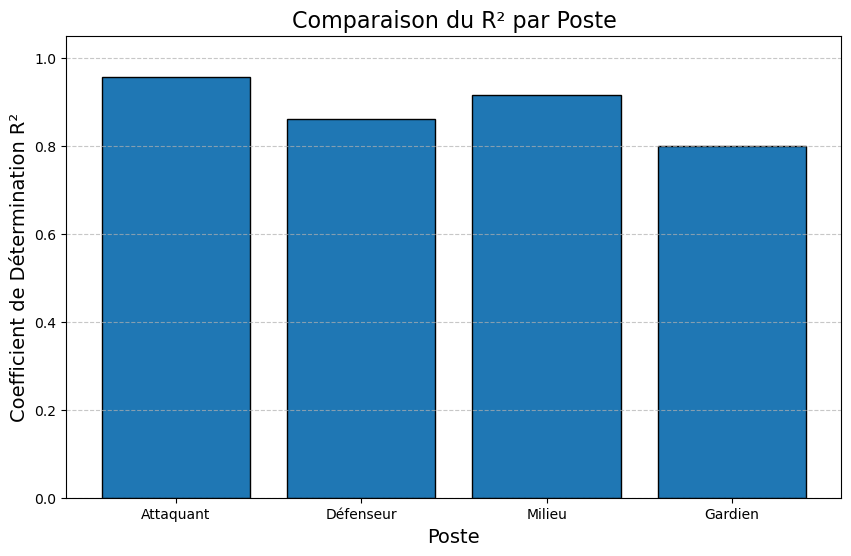

In [792]:
import matplotlib.pyplot as plt

# Vérifier que results_df existe sinon relancer le calcul des métriques
if 'results_df' not in locals():
    print("❌ Les résultats n'ont pas encore été calculés. Relance la cellule de calcul des métriques d'abord.")
else:
    # Tracer le barplot
    plt.figure(figsize=(10, 6))
    plt.bar(results_df['Poste'], results_df['R²'], edgecolor='black')
    plt.title("Comparaison du R² par Poste", fontsize=16)
    plt.xlabel("Poste", fontsize=14)
    plt.ylabel("Coefficient de Détermination R²", fontsize=14)
    plt.ylim(0, 1.05)  # Pour bien voir les différences jusqu'à 1
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [818]:
# 1. Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Sélectionner uniquement les gardiens
df_gardiens = df[df['Position'] == 'GK']

# 3. Définir target
target_column = 'Performance_Score'

# 4. Supprimer les variables trop évidentes
features_to_remove = ['Overall', 'GKReflexes', 'GKHandling', 'GKPositioning', 'GKDiving', 'GKKicking']
X = df_gardiens.select_dtypes(include=['float64', 'int64']).drop(columns=[target_column] + features_to_remove)
y = df_gardiens[target_column]

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Standardisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Créer un modèle légèrement moins fort
model_gardien = MLPRegressor(
    hidden_layer_sizes=(48, 24),
    alpha=0.0005,  # petite pénalisation
    max_iter=1000,
    random_state=42
)

model_gardien.fit(X_train_scaled, y_train)

# 8. Prédictions
y_pred = model_gardien.predict(X_test_scaled)

# 9. Évaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n🎯 Résultats pour les Gardiens (MLP régulé légèrement) :")
print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"R²  : {r2:.4f}")



🎯 Résultats pour les Gardiens (MLP régulé légèrement) :
MAE : 0.5606
MSE : 0.5781
R²  : 0.9716
